# Generowanie Krzywej ROC

## Pobranie danych z pliku

In [1]:
import numpy as np

file_name = "creditcard.csv"
file = open(file_name)
file.readline()  # skip the header
data = np.loadtxt(file, delimiter=',')

## Wydzielenie zbiorów

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[:, :30], data[:, 30:], random_state=0)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

## Resampling klas

In [3]:
from imblearn.over_sampling import SMOTE

X_train, Y_train = SMOTE(sampling_strategy=0.85).fit_resample(X_train, Y_train)

Using TensorFlow backend.
c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Definicja i wyuczenie modelu

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

classifier = make_pipeline(StandardScaler(), SelectKBest(score_func=f_classif, k=10), MLPClassifier(solver='sgd', activation='logistic'))
classifier.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('selectkbest',
                 SelectKBest(k=10,
                             score_func=<function f_classif at 0x00000237D261EE18>)),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='sgd',
                               tol=0.0001, validation_

## Confusion matrix - domyślny próg

[[70361   721]
 [   15   105]]


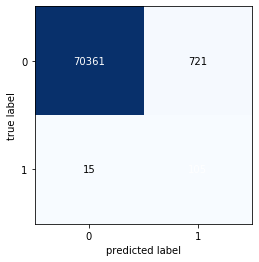

In [5]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, classifier.predict(X_test))
print(cm)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

## Rysowanie krzywej ROC

### False positive

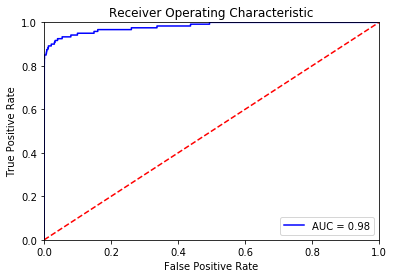

In [6]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### False negative

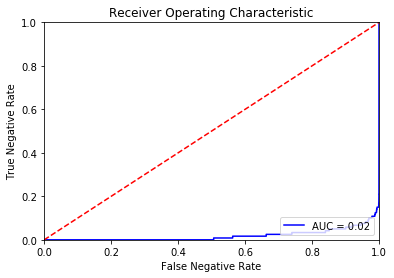

In [7]:
probs = classifier.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Negative Rate')
plt.xlabel('False Negative Rate')
plt.show()

## Wnioski z charakterystyki

Jak pokazuje charakterystyka, model jest mocno "radykalny" w swoich decyzjach. Aby zmienić jego czułośc należy zatem mocno zmodyfikować próg czułości

## Testy progu

### Inicjalizacja struktur testowych

In [13]:
scores_false_negative = []
scores_false_positive = []
thresholds = []

### n = 0.5

In [14]:
cm = confusion_matrix(Y_test, ((classifier.predict_proba(X_test) >= 0.5).astype(int)[:,1]))
print(cm)
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
thresholds.append("n = 0.5")

[[70361   721]
 [   15   105]]


### n = 0.4

In [15]:
cm = confusion_matrix(Y_test, ((classifier.predict_proba(X_test) >= 0.4).astype(int)[:,1]))
print(cm)
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
thresholds.append("n = 0.4")

[[70200   882]
 [   14   106]]


### n = 0.3

In [16]:
cm = confusion_matrix(Y_test, ((classifier.predict_proba(X_test) >= 0.3).astype(int)[:,1]))
print(cm)
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
thresholds.append("n = 0.3")

[[69728  1354]
 [   13   107]]


### n = 0.2

In [17]:
cm = confusion_matrix(Y_test, ((classifier.predict_proba(X_test) >= 0.2).astype(int)[:,1]))
print(cm)
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
thresholds.append("n = 0.2")

[[68925  2157]
 [   12   108]]


### n = 0.1

In [18]:
cm = confusion_matrix(Y_test, ((classifier.predict_proba(X_test) >= 0.1).astype(int)[:,1]))
print(cm)
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
thresholds.append("n = 0.1")

[[66030  5052]
 [    8   112]]


### n = 0.05

In [19]:
cm = confusion_matrix(Y_test, ((classifier.predict_proba(X_test) >= 0.05).astype(int)[:,1]))
print(cm)
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
thresholds.append("n = 0.05")

[[60268 10814]
 [    5   115]]


## Wyniki

### False negative

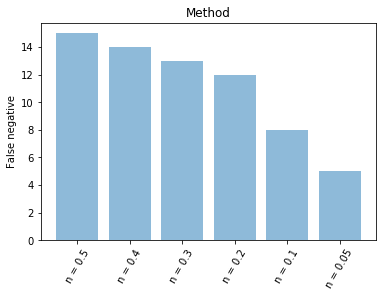

In [20]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(thresholds)), scores_false_negative, align='center', alpha=0.5)
plt.xticks(np.arange(len(thresholds)), thresholds, rotation = 60)
plt.ylabel('False negative')
plt.title('Method')

plt.show()

### False positive

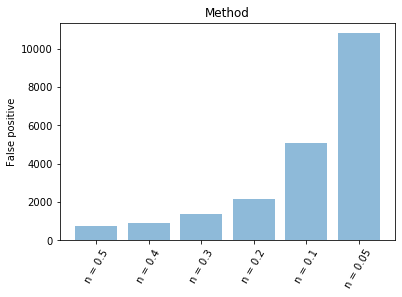

In [21]:
plt.bar(np.arange(len(thresholds)), scores_false_positive, align='center', alpha=0.5)
plt.xticks(np.arange(len(thresholds)), thresholds, rotation = 60)
plt.ylabel('False positive')
plt.title('Method')

plt.show()

## Podsumowanie

Zależnie od wybranego progu, wyniki dla poszczególnych klas są znacząco różne. Nie mozna tutaj wybrać jednoznacznie najlepszego rozwiązania, ale najbardziej spełniającym założenia wydaje się próg **n = 0.1**, ponieważ w obu przypadkach prawdopodobieństwo błędu wydaje się podobne (około 1 do 14)